<a href="https://colab.research.google.com/github/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/blob/main/Course%202/part4-EDA%20and%20Feature%20Enginering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [47]:
!pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  error: subprocess-exited-with-error
  
  × python setup.py egg_info did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  Preparing metadata (setup.py) ... error
error: metadata-generation-failed

× Encountered error while generating package metadata.
╰─> See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.neighbors import KNeighborsClassifier

In [49]:
url = "https://raw.githubusercontent.com/Ibnuamrithaher/Mechine-Learning-And-Deep-Learning/refs/heads/main/Course%202/Data/titanic.csv"
df = pd.read_csv(url, index_col="PassengerId")
df.drop(columns=["Name","Ticket","Cabin"], inplace=True)
df.head()


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


## Eksploratory Data Analysis

In [50]:
df.Survived.value_counts()

,count
Survived,
0,549
1,342


## **Numeric vs Target**

<ipython-input-51-91f414e6288e>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 0], bins=[0,5,12,18,40,120], color="r", label="nor survive")
<ipython-input-51-91f414e6288e>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Age[df.Survived == 1], bins=[0,5,12,18,40,120], 

<Axes: xlabel='Age', ylabel='Density'>

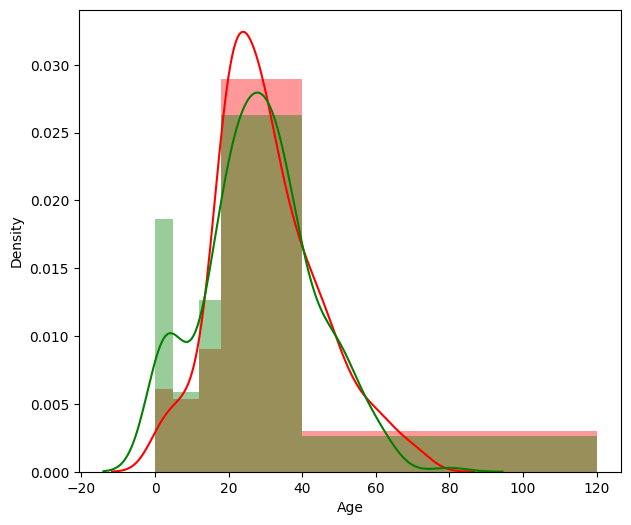

In [51]:
plt.figure(figsize=(7,6))
sns.distplot(df.Age[df.Survived == 0], bins=[0,5,12,18,40,120], color="r", label="nor survive")
sns.distplot(df.Age[df.Survived == 1], bins=[0,5,12,18,40,120], color="g", label="survive")

<ipython-input-52-1eaafe934c93>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="nor survive")
<ipython-input-52-1eaafe934c93>:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survive")


<Axes: xlabel='Fare', ylabel='Density'>

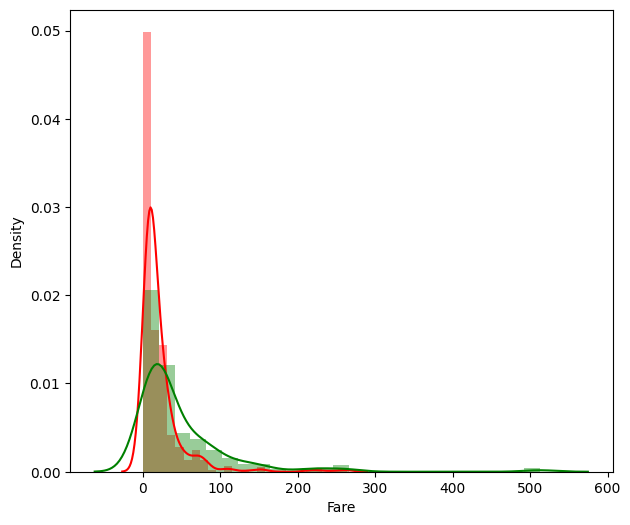

In [52]:
plt.figure(figsize=(7,6))
sns.distplot(df.Fare[df.Survived == 0], bins=25, color="r", label="nor survive")
sns.distplot(df.Fare[df.Survived == 1], bins=25, color="g", label="survive")

## **Categoric / Ordinal vs Target**

In [53]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S
2,1,1,female,38.0,1,0,71.2833,C
3,1,3,female,26.0,0,0,7.9250,S
4,1,1,female,35.0,1,0,53.1000,S
5,0,3,male,35.0,0,0,8.0500,S


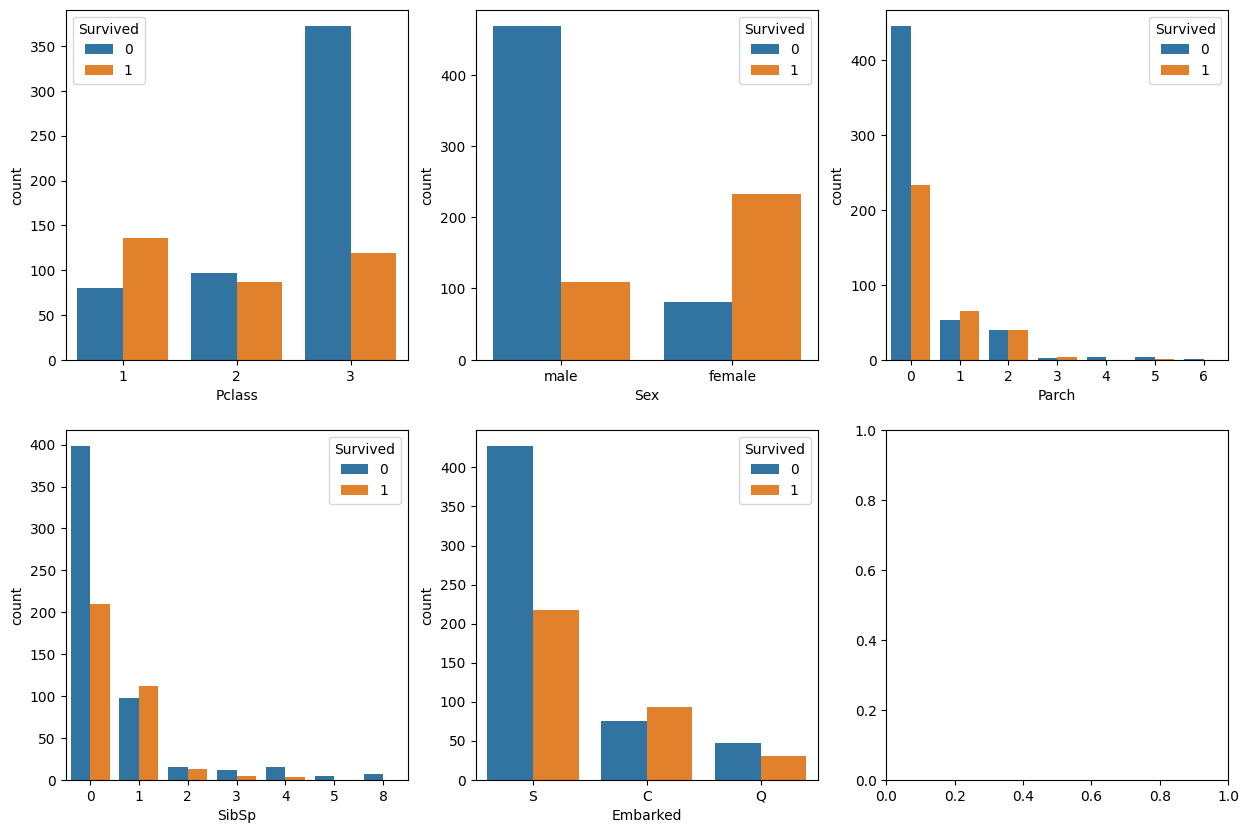

In [54]:
cat_var = ["Pclass","Sex","Parch","SibSp","Embarked"]

fig, axes = plt.subplots(2, 3, figsize=(15,10))
for cat, ax in zip(cat_var, axes.flatten()):
  sns.countplot(x=cat, data=df, hue="Survived", ax=ax)


## **Pandas Crosstab (Optional)**

In [55]:
pd.crosstab(df.Pclass,df.Survived, normalize='index')

Survived,0,1
Pclass,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


## **Feature Engineering**

### Adding Feature => isAlone

In [56]:
df["isAlone"] = (df.SibSp == 0) & (df.Parch == 0)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,22.0,1,0,7.2500,S,False
2,1,1,female,38.0,1,0,71.2833,C,False
3,1,3,female,26.0,0,0,7.9250,S,True
4,1,1,female,35.0,1,0,53.1000,S,False
5,0,3,male,35.0,0,0,8.0500,S,True


## **Binning**

In [57]:
df.Age = pd.cut(df.Age, bins=[0,5,12,18,40,120], labels=["balita","anak-anak","remaja","dewasa","lansia"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,7.2500,S,False
2,1,1,female,dewasa,1,0,71.2833,C,False
3,1,3,female,dewasa,0,0,7.9250,S,True
4,1,1,female,dewasa,1,0,53.1000,S,False
5,0,3,male,dewasa,0,0,8.0500,S,True


In [58]:
df.Fare = pd.cut(df.Fare, bins=[0,25,100,600], labels=["murah","mahal","eksekutif"])
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,isAlone
PassengerId,,,,,,,,,
1,0,3,male,dewasa,1,0,murah,S,False
2,1,1,female,dewasa,1,0,mahal,C,False
3,1,3,female,dewasa,0,0,murah,S,True
4,1,1,female,dewasa,1,0,mahal,S,False
5,0,3,male,dewasa,0,0,murah,S,True


## **Dataset Splitting**

In [59]:
# Dataset splitting
x = df.drop(columns="Survived")
y = df.Survived

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, stratify=y, random_state=42)
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((712, 8), (179, 8), (712,), (179,))

## **Preprocessor**

In [60]:
!pip install jcopml

In [61]:
from jcopml.pipeline import num_pipe, cat_pipe

In [62]:
# Preprocessor
preprocessor = ColumnTransformer([
    ("numeric", num_pipe(scaling="minmax"), ["SibSp","Parch"]),
    ("categoric", cat_pipe(encoder="onehot"), ["Pclass","Sex","Age","Fare","Embarked","isAlone"])
])

## **Training**

In [63]:
from jcopml.tuning import grid_search_params as gsp

In [64]:
gsp.knn_params

{'algo__n_neighbors': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29]),
 'algo__weights': ['uniform', 'distance'],
 'algo__p': [1, 1.5, 2]}

In [65]:
pipeline = Pipeline([
    ("prep",preprocessor),
    ("algo",KNeighborsClassifier())
])

model = GridSearchCV(pipeline, gsp.knn_params, cv=3, n_jobs=-1, verbose=1)
model.fit(x_train,y_train)

#Evaluation
print(model.best_params_)
print(model.score(x_train,y_train), model.best_score_, model.score(x_test,y_test))

Fitting 3 folds for each of 90 candidates, totalling 270 fits
{'algo__n_neighbors': 7, 'algo__p': 2, 'algo__weights': 'uniform'}
0.8455056179775281 0.8160302095521752 0.7821229050279329
